In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

In [2]:
# Configuração do gerador de dados
datagen = ImageDataGenerator(
    rescale=1./255,          # Normaliza os valores dos pixels para [0, 1]
    rotation_range=20,       # Aumento de dados: rotação aleatória
    width_shift_range=0.2,   # Aumento de dados: deslocamento horizontal
    height_shift_range=0.2,  # Aumento de dados: deslocamento vertical
    shear_range=0.2,         # Aumento de dados: cisalhamento
    zoom_range=0.2,          # Aumento de dados: zoom aleatório
    horizontal_flip=True,    # Aumento de dados: flip horizontal
    fill_mode='nearest',     # Preenche pixels faltantes
    validation_split=0.2     # Separa 20% dos dados para validação
)

# Gerador para dados de treinamento
train_generator = datagen.flow_from_directory(
    '/content/brain-tumor',   # Caminho para a pasta raiz
    target_size=(150, 150),  # Redimensiona as imagens para 150x150
    batch_size=32,
    class_mode='binary',     # Classificação binária (tumor ou não tumor)
    subset='training',       # Usa 80% dos dados para treinamento
    classes=['yes', 'no']    # Especifica as classes manualmente
)

# Gerador para dados de validação
validation_generator = datagen.flow_from_directory(
    '/content/brain-tumor',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation' ,
    classes=['yes', 'no'] # Usa 20% dos dados para validação
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Evita overfitting
    Dense(1, activation='sigmoid')  # Saída binária (tumor ou não tumor)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5087 - loss: 1.1061 - val_accuracy: 0.4062 - val_loss: 0.6963
Epoch 2/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4375 - loss: 0.7038

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4375 - loss: 0.7038 - val_accuracy: 0.6667 - val_loss: 0.6783
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step - accuracy: 0.5427 - loss: 0.6772
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6562 - loss: 0.6301 - val_accuracy: 0.5625 - val_loss: 0.6619
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5923 - loss: 0.6768 - val_accuracy: 0.7222 - val_loss: 0.5485
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5455 - loss: 0.7029
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5977 - loss: 0.6619 - val_accuracy: 0.6562 - val_loss: 0.5950
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8182 - loss: 0.5362 - val_accuracy: 0.6111 - val_loss: 0.5754
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6095 - loss: 0.6504
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7500 - loss: 0.5703 - val_accuracy: 0.7188 - val_loss: 0.4912
Epoch 11

In [5]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7671 - loss: 0.5263
Loss: 0.5215108394622803, Accuracy: 0.7599999904632568


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Matriz de Confusão:
[[25  6]
 [15  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

    No Tumor       0.62      0.81      0.70        31
       Tumor       0.40      0.21      0.28        19

    accuracy                           0.58        50
   macro avg       0.51      0.51      0.49        50
weighted avg       0.54      0.58      0.54        50


Sensibilidade (Recall): 0.21
Especificidade: 0.81


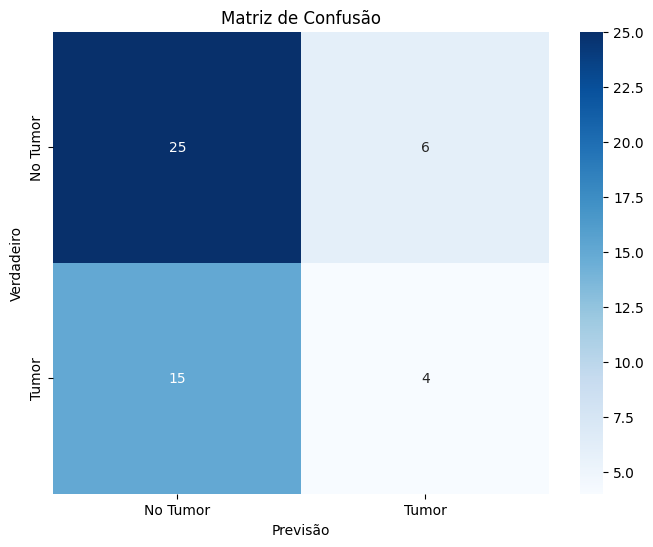

In [11]:
# Obter as previsões do modelo no conjunto de validação
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).astype(int)  # Converte as probabilidades em classes (0 ou 1)

# Obter as classes reais
y_true = validation_generator.classes

# Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de Classificação (precisão, recall, F1-score, acurácia)
print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))

# Cálculo de Sensibilidade (Recall) e Especificidade
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"\nSensibilidade (Recall): {sensitivity:.2f}")
print(f"Especificidade: {specificity:.2f}")

# Visualização da Matriz de Confusão com Matplotlib e Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.show()

In [8]:
model.save('/content/modelo_tumor_cerebral.h5')
print("Modelo salvo como 'modelo_tumor_cerebral.h5'")

Modelo salvo como 'modelo_tumor_cerebral.h5'


In [16]:
# Carregar o modelo salvo
model = load_model('modelo_tumor_cerebral.h5')

# Função para carregar e pré-processar a imagem
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalização
    return img_array

# Caminho da pasta com as imagens
image_folder = '/content/brain-images'

# Iterar sobre todas as imagens na pasta
for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)

    # Verifica se é um arquivo de imagem
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Carregar e pré-processar a imagem
        img_array = load_and_preprocess_image(img_path)

        # Fazer a predição
        prediction = model.predict(img_array)

        # Exibir o resultado
        result = "Tumor detectado" if prediction[0] > 0.5 else "Nenhum tumor detectado"
        print(f"Imagem: {filename} - Resultado: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Imagem: 00058_122.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Imagem: 00060_71.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Imagem: 00056_92.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Imagem: 00058_102.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Imagem: 00059_103.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Imagem: 00059_122.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Imagem: 00060_69.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Imagem: MRI_of_Human_Brain.jpg - Resultado: Nenhum tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Imagem: 00059_141.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Imagem: 00061_108.jpg - Resultado: Tumor detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Imagem: 00056_129.jpg - Resultado: Tumor detectado
1/1 ━━━